# <font color='#019587'> YouTube Spam Comment Detection

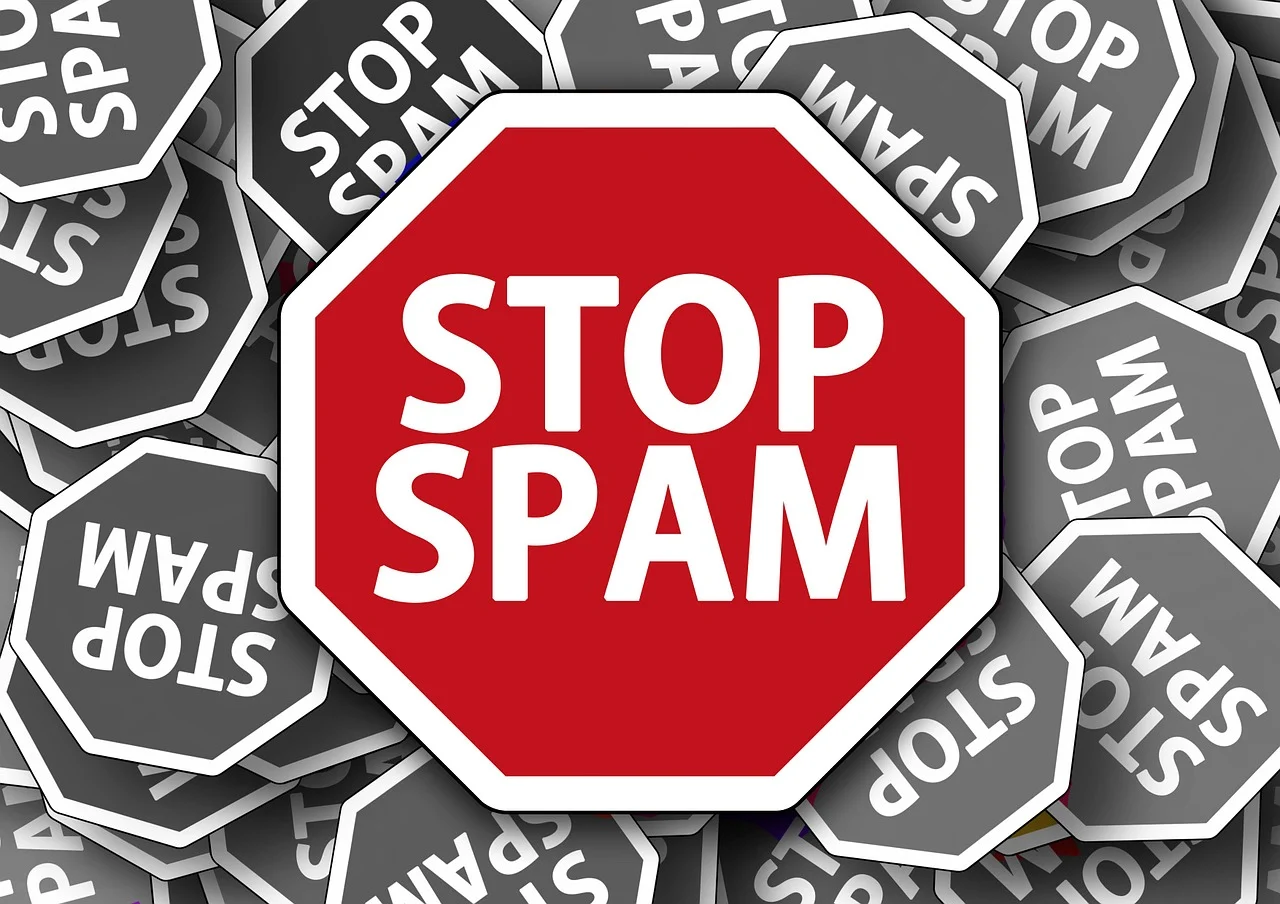
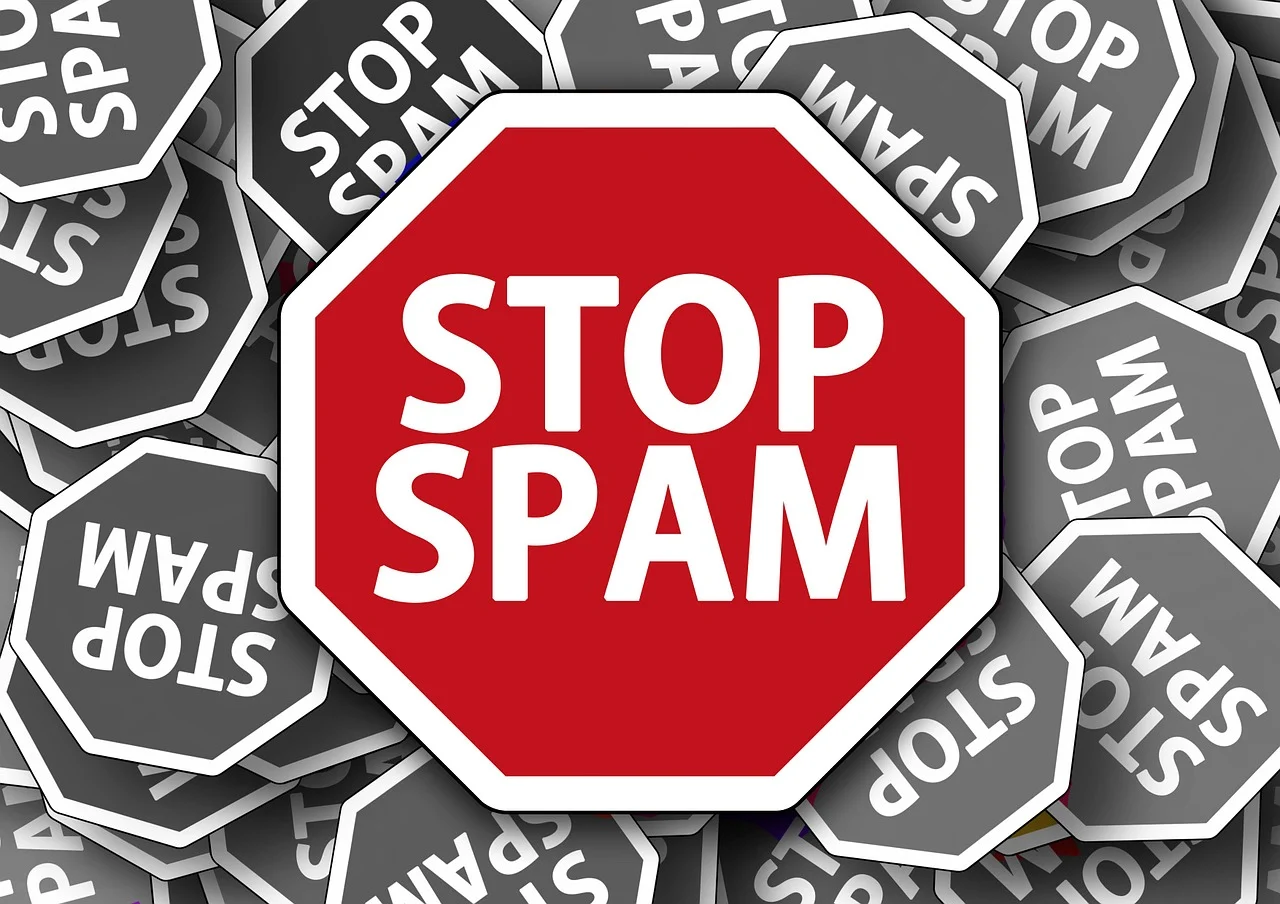

## <font color='#019587'> Introduction

Spam detection is a critical challenge in online platforms, particularly in user-generated content such as YouTube comments. The **YouTube Spam Collection** dataset consists of 1,956 real messages extracted from five popular videos, with comments labeled as either **spam (1)** or **ham (0)**. This project aims to develop a machine learning model to classify YouTube comments as spam or non-spam based on their textual content. By leveraging Natural Language Processing (NLP) techniques and machine learning algorithms, we seek to enhance automated moderation systems, ensuring a cleaner and more meaningful user experience. The dataset contains structured attributes such as `COMMENT_ID`, `AUTHOR`, `DATE`, `CONTENT`, and `CLASS`, which serve as the foundation for feature extraction and model training. Through this project, we explore various text-processing methods, classification models, and evaluation metrics to achieve high accuracy in detecting spam comments effectively.


## <font color='#019587'> Requirements

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',None)

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

import nltk
nltk.download("stopwords")
import re
from nltk.corpus import stopwords
import string

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## <font color='#019587'> Import Data

In [2]:
df1=pd.read_csv('/kaggle/input/images/Youtube01-Psy.csv')
df2=pd.read_csv('/kaggle/input/images/Youtube02-KatyPerry.csv')
df3=pd.read_csv('/kaggle/input/images/Youtube03-LMFAO.csv')
df4=pd.read_csv('/kaggle/input/images/Youtube04-Eminem.csv')
df5=pd.read_csv('/kaggle/input/images/Youtube05-Shakira.csv')

In [3]:
df=pd.concat([df1,df2,df3,df4,df5],ignore_index=True)

## <font color='#019587'> EDA(Exploratory Data Analysis)

In [4]:
df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [6]:
df.shape

(1956, 5)

In [7]:
df.isnull().sum()

COMMENT_ID      0
AUTHOR          0
DATE          245
CONTENT         0
CLASS           0
dtype: int64

In [9]:
df['CLASS'].value_counts()

CLASS
1    1005
0     951
Name: count, dtype: int64

## <font color='#019587'> Preprocess Text

In [10]:
stemmer=nltk.SnowballStemmer('english')
stopword=set(stopwords.words('english'))
def clean_text(text_column):
    df[text_column]=df[text_column].str.lower()
    df[text_column]=df[text_column].str.replace('[^\w\s]', '', regex=True)
    df[text_column] = df[text_column].str.replace('\w*\d\w*', '', regex=True)
    df[text_column] = df[text_column].str.replace('\n', '', regex=True)
    df[text_column] = df[text_column].str.replace('\r', '', regex=True)
    df[text_column] = df[text_column].str.replace('https?://\S+|www\.\S+', '', regex=True)
    df[text_column] = df[text_column].str.replace('<.*?>+', '', regex=True)
    df[text_column] = df[text_column].str.replace('\[.*?\]', '', regex=True)

    df[text_column]=df[text_column].apply(lambda x:' '.join(
        stemmer.stem(word)
        for word in x.split()
        if word not in stopword
    ))
    return df[text_column]

In [12]:
df.iloc[0]['CONTENT']

'Huh, anyway check out this you[tube] channel: kobyoshi02'

In [13]:
df['CONTENT']=clean_text('CONTENT')

In [14]:
df.iloc[0]['CONTENT']

'huh anyway check youtub channel'

In [15]:
df['CLASS']=df['CLASS'].map({0:'Not Spam',1:'Spam'})

In [16]:
df.sample(3)

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
770,z122wfsbyvfeip0wl04cefjz1svzcd25vqg0k,jesus sanchez,2015-05-25T05:37:32.023000,,Not Spam
904,z12pwrxj0kfrwnxye04cjxtqntycd1yia44,‫ארז אריה‬‎,2015-05-15T19:46:53.719000,good parti,Not Spam
1799,_2viQ_Qnc69d37KEGZqBfleT0syzA1usOUM89zKNBGs,Gabriella Korotasz,2013-10-04T22:49:59.635000,pretti,Not Spam


## <font color='#019587'> Word Cloud

In [17]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from PIL import Image
def wc(data,color):
    plt.figure(figsize=(10,10))
   # mask=np.array(Image.open('cloud.png'))
    wc=WordCloud(background_color=color,stopwords=STOPWORDS)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

### <font color='#019587'>  Word Cloud for Spam Comments

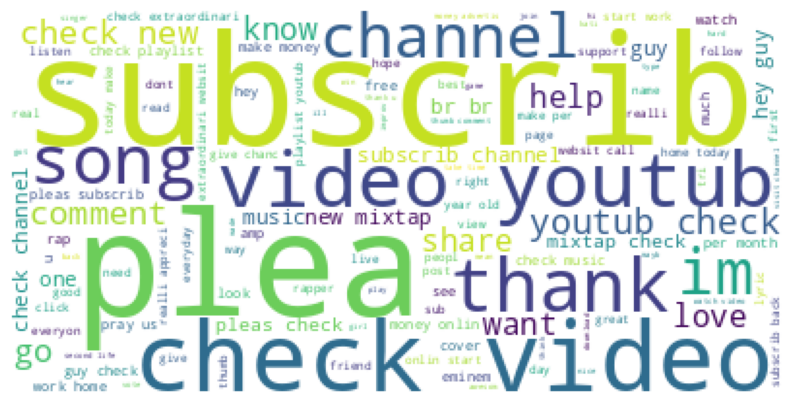

In [18]:
wc(df[df["CLASS"]=='Spam']["CONTENT"],"white")

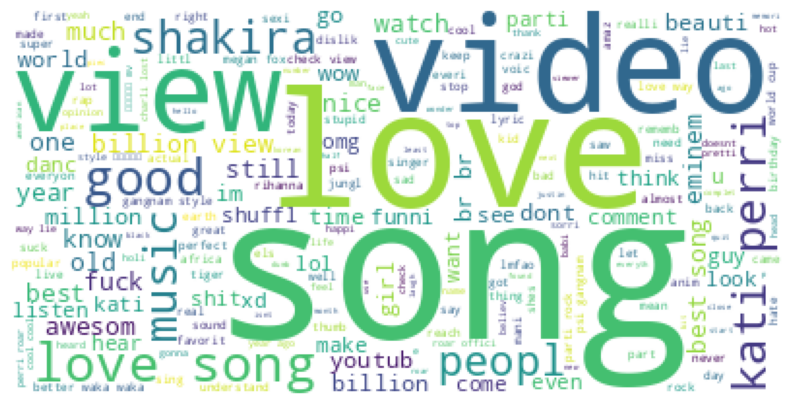

In [19]:
wc(df[df["CLASS"]=='Not Spam']["CONTENT"],"white")

## <font color='#019587'> The Most Used Words for Spam Texts

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngrams(texts, ngram_range=(2, 3), top_n=10):
    vect = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    dtm = vect.fit_transform(texts)
    ngram_counts = dtm.sum(axis=0)
    ngrams_freq = [(word, ngram_counts[0, idx]) for word, idx in vect.vocabulary_.items()]
    return sorted(ngrams_freq, key=lambda x: x[1], reverse=True)[:top_n]

In [21]:
spam_text = df[df["CLASS"]=='Spam']["CONTENT"]
spam_ngrams = get_top_ngrams(spam_text, ngram_range=(2, 2), top_n=20)
spam_ngrams

[('check video', 142),
 ('video youtub', 111),
 ('check new', 63),
 ('check channel', 45),
 ('subscrib channel', 44),
 ('br br', 44),
 ('new mixtap', 39),
 ('hey guy', 38),
 ('pleas subscrib', 37),
 ('make money', 37),
 ('check playlist', 37),
 ('guy check', 36),
 ('pleas check', 36),
 ('mixtap check', 36),
 ('like comment', 34),
 ('money onlin', 31),
 ('make month', 31),
 ('check music', 29),
 ('work home', 27),
 ('check extraordinari', 26)]

## <font color='#019587'> The Most Used Words for Non Spam Texts

In [23]:
non_spam_text = df[df["CLASS"]=='Not Spam']["CONTENT"]
non_spam_ngrams = get_top_ngrams(non_spam_text, ngram_range=(2, 2), top_n=20)
non_spam_ngrams

[('love song', 51),
 ('kati perri', 40),
 ('billion view', 30),
 ('best song', 26),
 ('br br', 21),
 ('gangnam style', 14),
 ('megan fox', 13),
 ('check view', 11),
 ('waka waka', 11),
 ('parti rock', 10),
 ('like song', 9),
 ('love way', 8),
 ('way lie', 8),
 ('view million', 7),
 ('nice song', 7),
 ('good song', 7),
 ('world cup', 7),
 ('million view', 6),
 ('video billion', 6),
 ('video youtub', 6)]

## <font color='#019587'> Modelling

In [28]:
x=df['CONTENT']
y=df['CLASS']

In [29]:
x.shape,y.shape

((1956,), (1956,))

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import confusion_matrix
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',100)

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier  
from sklearn.naive_bayes import MultinomialNB    


def classification_test(x,y,vect,confusion_mtr=False):
    b=BernoulliNB()
    l=LogisticRegression()
    d=DecisionTreeClassifier()
    rf=RandomForestClassifier()
    h=GradientBoostingClassifier()
    a=AdaBoostClassifier()
    m=MultinomialNB()
    algos=[b,l,d,rf,h,a,b]

    algo_names=['Bernoulli NB','Logistic Regression','Decision Tree Classifier','Random Forest Classifier','Gradient Boosting Classifier','Ada Boost Classifier','Multinomial NB']

    accuracy=[]
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    result=pd.DataFrame(columns=['Accuracy Score'],index=algo_names)

    for i, algo in enumerate(algos):
        x_train_dtm = vect.fit_transform(x_train)
        x_test_dtm = vect.transform(x_test)

        if hasattr(algo, 'fit'):
            x_train_dtm = x_train_dtm  
            x_test_dtm = x_test_dtm   

        p = algo.fit(x_train_dtm, y_train).predict(x_test_dtm)
        accuracy.append(accuracy_score(y_test, p))
        if confusion_mtr:
            cm = confusion_matrix(y_test, p)
            plt.figure(figsize=(5, 5))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=algo.classes_, yticklabels=algo.classes_,cbar=None)
            plt.title(f"Confusion Matrix - {algo_names[i]}")
            plt.xlabel('Predicted Label')
            plt.ylabel('True Label')
            plt.show()

    result['Accuracy Score']=accuracy

    r_table=result.sort_values('Accuracy Score',ascending=False)
    
        
        
    return r_table[['Accuracy Score']]
    

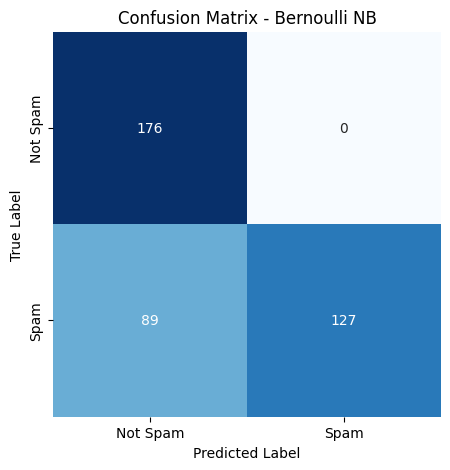

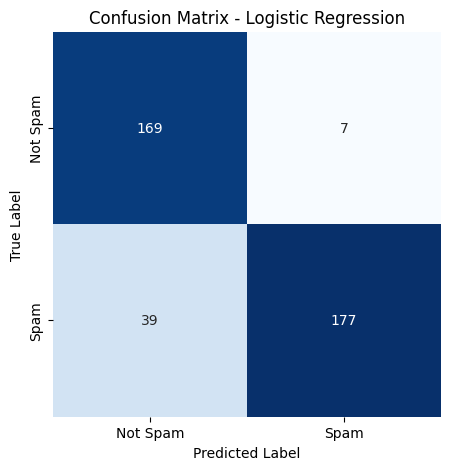

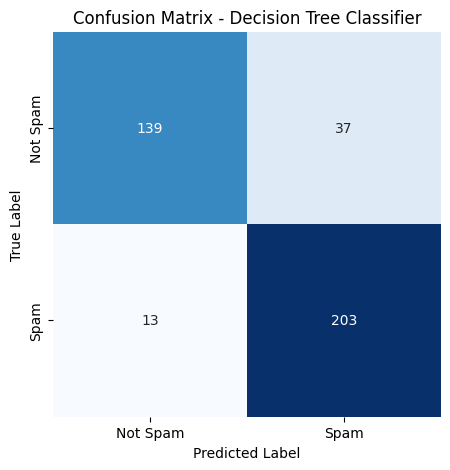

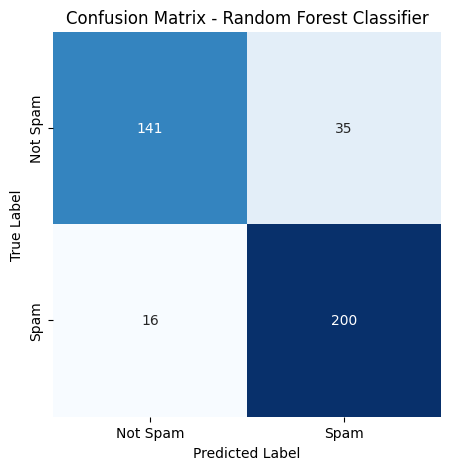

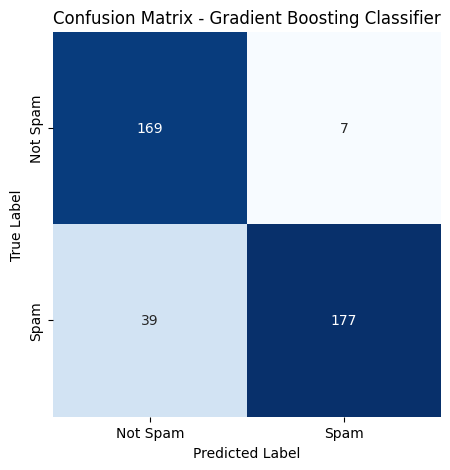

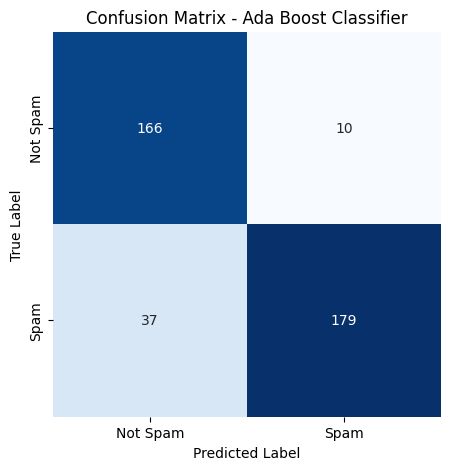

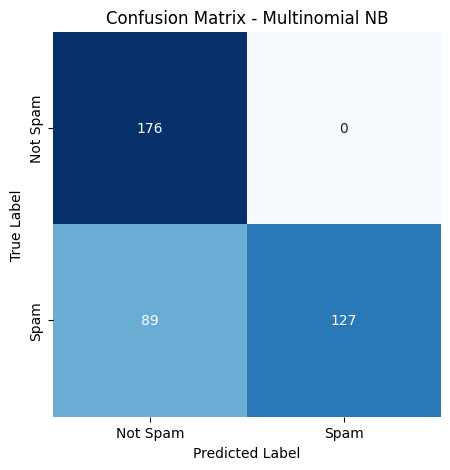

,Accuracy Score
Logistic Regression,0.882653
Gradient Boosting Classifier,0.882653
Ada Boost Classifier,0.880102
Decision Tree Classifier,0.872449
Random Forest Classifier,0.869898
Bernoulli NB,0.772959
Multinomial NB,0.772959


In [31]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(ngram_range=(1,2))
classification_test(x,y,vect,confusion_mtr=True)

## <font color='#019587'> Picking the Best Model

In [32]:
vect = CountVectorizer(ngram_range=(1,2))
l=LogisticRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train_dtm = vect.fit_transform(x_train)
x_test_dtm = vect.transform(x_test)
model=l.fit(x_train_dtm, y_train)
predictions=model.predict(x_test_dtm)

In [33]:
accuracy_score(y_test, predictions)

0.8826530612244898

In [34]:
import joblib  

joblib.dump(model, 'logistic_regression_model.pkl')
joblib.dump(vect, 'vectorizer.pkl')

['vectorizer.pkl']

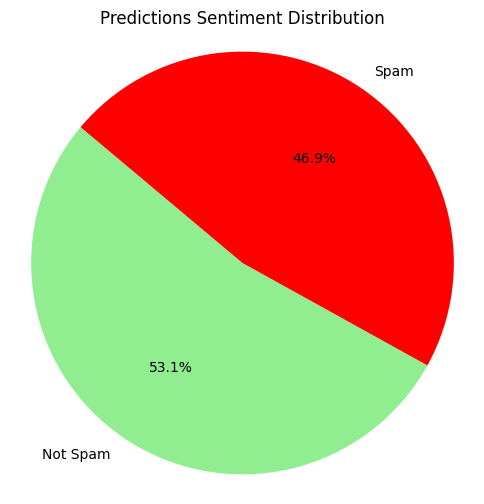

In [35]:
predictions_series = pd.Series(predictions)

predictions_counts = predictions_series.value_counts()

plt.figure(figsize=(6, 6))
plt.pie(
    predictions_counts, 
    labels=predictions_counts.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=['lightgreen','red','lightblue']  
)
plt.title('Predictions Sentiment Distribution')
plt.axis('equal')  
plt.show()

## <font color='#019587'> Testing the Model

In [36]:
text=['Chack my videooo and subscribe my channel']
text=vect.transform(text)
model.predict(text)

array(['Spam'], dtype=object)

In [37]:
text=['I really like this song']
text=vect.transform(text)
model.predict(text)

array(['Not Spam'], dtype=object)

# #<font color='#019587'>   **Conclusion**

In this project, we developed a machine learning model to detect spam comments on YouTube using the **YouTube Spam Collection** dataset. We evaluated multiple classification models, including **Logistic Regression, Gradient Boosting, AdaBoost, Decision Tree, Random Forest, and Naïve Bayes (Bernoulli and Multinomial)**. Based on the accuracy scores, **Logistic Regression** and **Gradient Boosting Classifier** achieved the highest accuracy of **88.27%**, making them the best-performing models for this task.

### <font color='#019587'>  **Confusion Matrix Analysis (Logistic Regression)**
From the confusion matrix, we observe the following:
- **True Positives (Spam correctly classified as Spam):** 177  
- **True Negatives (Not Spam correctly classified as Not Spam):** 169  
- **False Positives (Not Spam incorrectly classified as Spam):** 7  
- **False Negatives (Spam incorrectly classified as Not Spam):** 39  

The model performs well in detecting spam comments, but there is room for improvement in minimizing **false negatives**, where actual spam comments are misclassified as non-spam. This could be addressed by further optimizing hyperparameters, experimenting with feature engineering techniques, or incorporating deep learning approaches.

### <font color='#019587'>  **Final Thoughts**
This study highlights the effectiveness of **Logistic Regression** and **Gradient Boosting** in spam detection tasks. Future improvements could explore **word embeddings (Word2Vec, TF-IDF, or BERT)** and **ensemble techniques** to further enhance classification performance. Automating spam detection with machine learning contributes to a safer and cleaner online community by reducing unwanted spam messages effectively.